In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pickle

import sys
import os

# Adding parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src import colony
from util import plotter

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# First check that the range of required BCs are feasible for the given model
# E.g. for this 100SL model, pressure <= 2 mmHg and flows of 11, 200, etc. mL/min were impossible (required negative R_SL)
pressures = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
flows = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Load the model
filepath = '../results/100SL/sample0/model.pkl'
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

for pressure in pressures:
    # Convert pressure mmHg to to dyn/mm^2
    pressure *= 13.3322
    # Compute Req of the modeled vessels in the system by setting RSL = 0
    Qzero, _ = col.queryQin(RSL = 0, Pin = pressure, Pout = 0)
    Rzero = pressure/Qzero
    for flow in flows:
        # Convert flow from mL/min to mm^3/s
        flow *= 1000/60
        # Now compute the Req of the system required to satisfy these conditions Req = deltaP/Q
        Req = pressure/flow
        # Check that Req is greater than Rzero (e.g. there exists a non-negative RSL that can satify the P/Q BCs)
        if Req < Rzero:
            print('Impossible BCs: P = %d, Q = %d --> Rzero = %.3f > Req = %.3f' %(pressure/13.3322, flow*3/50, Rzero, Req))
        else:
            print('BCs: P = %d, Q = %d yields a valid Rzero < Req' %(pressure/13.3322, flow*3/50))

BCs: P = 3, Q = 100 yield a valid Rzero < Req
BCs: P = 3, Q = 200 yield a valid Rzero < Req
BCs: P = 3, Q = 300 yield a valid Rzero < Req
BCs: P = 3, Q = 400 yield a valid Rzero < Req
BCs: P = 3, Q = 500 yield a valid Rzero < Req
BCs: P = 3, Q = 600 yield a valid Rzero < Req
BCs: P = 3, Q = 700 yield a valid Rzero < Req
BCs: P = 3, Q = 800 yield a valid Rzero < Req
BCs: P = 3, Q = 900 yield a valid Rzero < Req
BCs: P = 3, Q = 1000 yield a valid Rzero < Req
BCs: P = 4, Q = 100 yield a valid Rzero < Req
BCs: P = 4, Q = 200 yield a valid Rzero < Req
BCs: P = 4, Q = 300 yield a valid Rzero < Req
BCs: P = 4, Q = 400 yield a valid Rzero < Req
BCs: P = 4, Q = 500 yield a valid Rzero < Req
BCs: P = 4, Q = 600 yield a valid Rzero < Req
BCs: P = 4, Q = 700 yield a valid Rzero < Req
BCs: P = 4, Q = 800 yield a valid Rzero < Req
BCs: P = 4, Q = 900 yield a valid Rzero < Req
BCs: P = 4, Q = 1000 yield a valid Rzero < Req
BCs: P = 5, Q = 100 yield a valid Rzero < Req
BCs: P = 5, Q = 200 yield a vali

In [3]:
def getMaxWSS(col):
    maxWSS = -np.inf
    for branch in col.branchList:
        WSS = branch.getWSS()
        if WSS > maxWSS:
            maxWSS = WSS
    return maxWSS

def getWSSLims(col):
    maxWSS = -np.inf
    minWSS = np.inf
    for branch in col.branchList:
        WSS = branch.getWSS()
        if WSS > maxWSS:
            maxWSS = WSS
        if WSS < minWSS:
            minWSS = WSS
    return minWSS, maxWSS

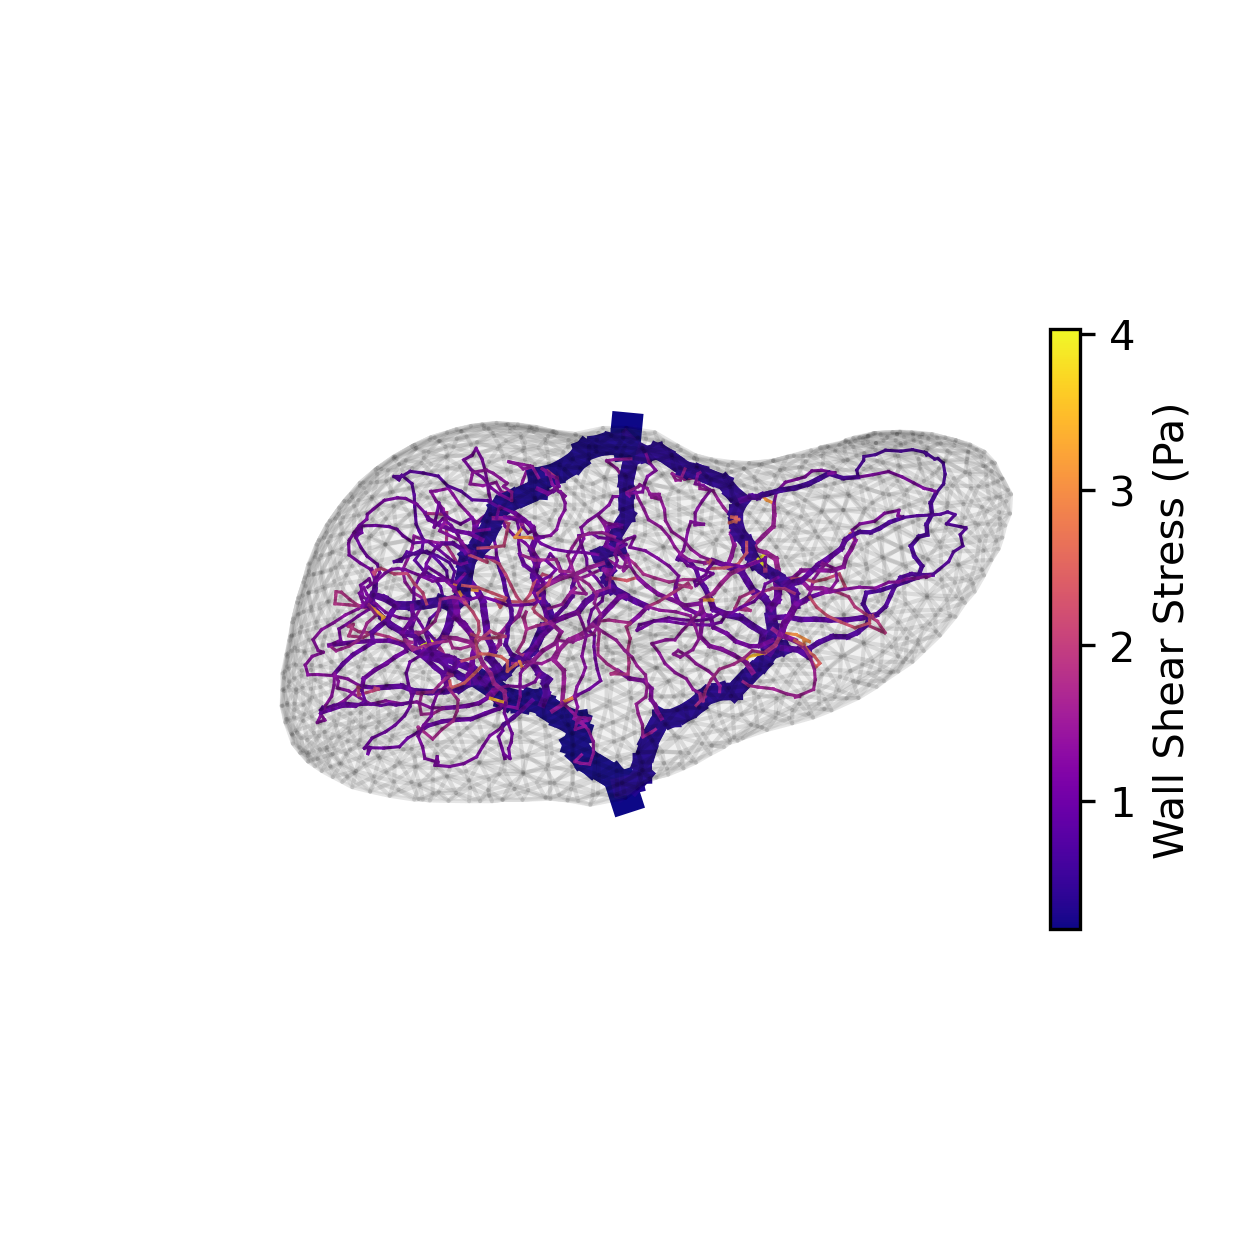

In [3]:
# Plotting a random model to check results qualitatively
filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(3, 1000)
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

plotter.plotWSS(col, 3.5)

In [7]:
pressures = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
flows = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

WSS = np.zeros((len(pressures), len(flows)))

for i, pressure in enumerate(pressures):
    for j, flow in enumerate(flows):
        filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(pressure, flow)
        with open(filepath, 'rb') as handle:
            col = pickle.load(handle)
        # Compute the WSS for loaded model
        col.setWSS(mu = 3.5) #cP
        # maxWSS = getMaxWSS(col)
        minWSS, maxWSS = getWSSLims(col)
        # print('P = %.1f, Q = %d, WSS = (%.3f, %.3f)' %(pressure, flow, minWSS, maxWSS))
        WSS[i, j] = maxWSS

P = 3.0, Q = 100, WSS = (0.018, 0.187)
P = 3.0, Q = 200, WSS = (0.035, 0.399)
P = 3.0, Q = 300, WSS = (0.053, 0.641)
P = 3.0, Q = 400, WSS = (0.070, 0.920)
P = 3.0, Q = 500, WSS = (0.088, 1.245)
P = 3.0, Q = 600, WSS = (0.106, 1.625)
P = 3.0, Q = 700, WSS = (0.123, 2.075)
P = 3.0, Q = 800, WSS = (0.141, 2.610)
P = 3.0, Q = 900, WSS = (0.158, 3.254)
P = 3.0, Q = 1000, WSS = (0.176, 4.032)
P = 4.0, Q = 100, WSS = (0.018, 0.184)
P = 4.0, Q = 200, WSS = (0.035, 0.386)
P = 4.0, Q = 300, WSS = (0.053, 0.609)
P = 4.0, Q = 400, WSS = (0.070, 0.855)
P = 4.0, Q = 500, WSS = (0.088, 1.129)
P = 4.0, Q = 600, WSS = (0.106, 1.435)
P = 4.0, Q = 700, WSS = (0.123, 1.779)
P = 4.0, Q = 800, WSS = (0.141, 2.167)
P = 4.0, Q = 900, WSS = (0.158, 2.606)
P = 4.0, Q = 1000, WSS = (0.176, 3.107)
P = 5.0, Q = 100, WSS = (0.018, 0.182)
P = 5.0, Q = 200, WSS = (0.035, 0.379)
P = 5.0, Q = 300, WSS = (0.053, 0.590)
P = 5.0, Q = 400, WSS = (0.070, 0.820)
P = 5.0, Q = 500, WSS = (0.088, 1.068)
P = 5.0, Q = 600, WSS =

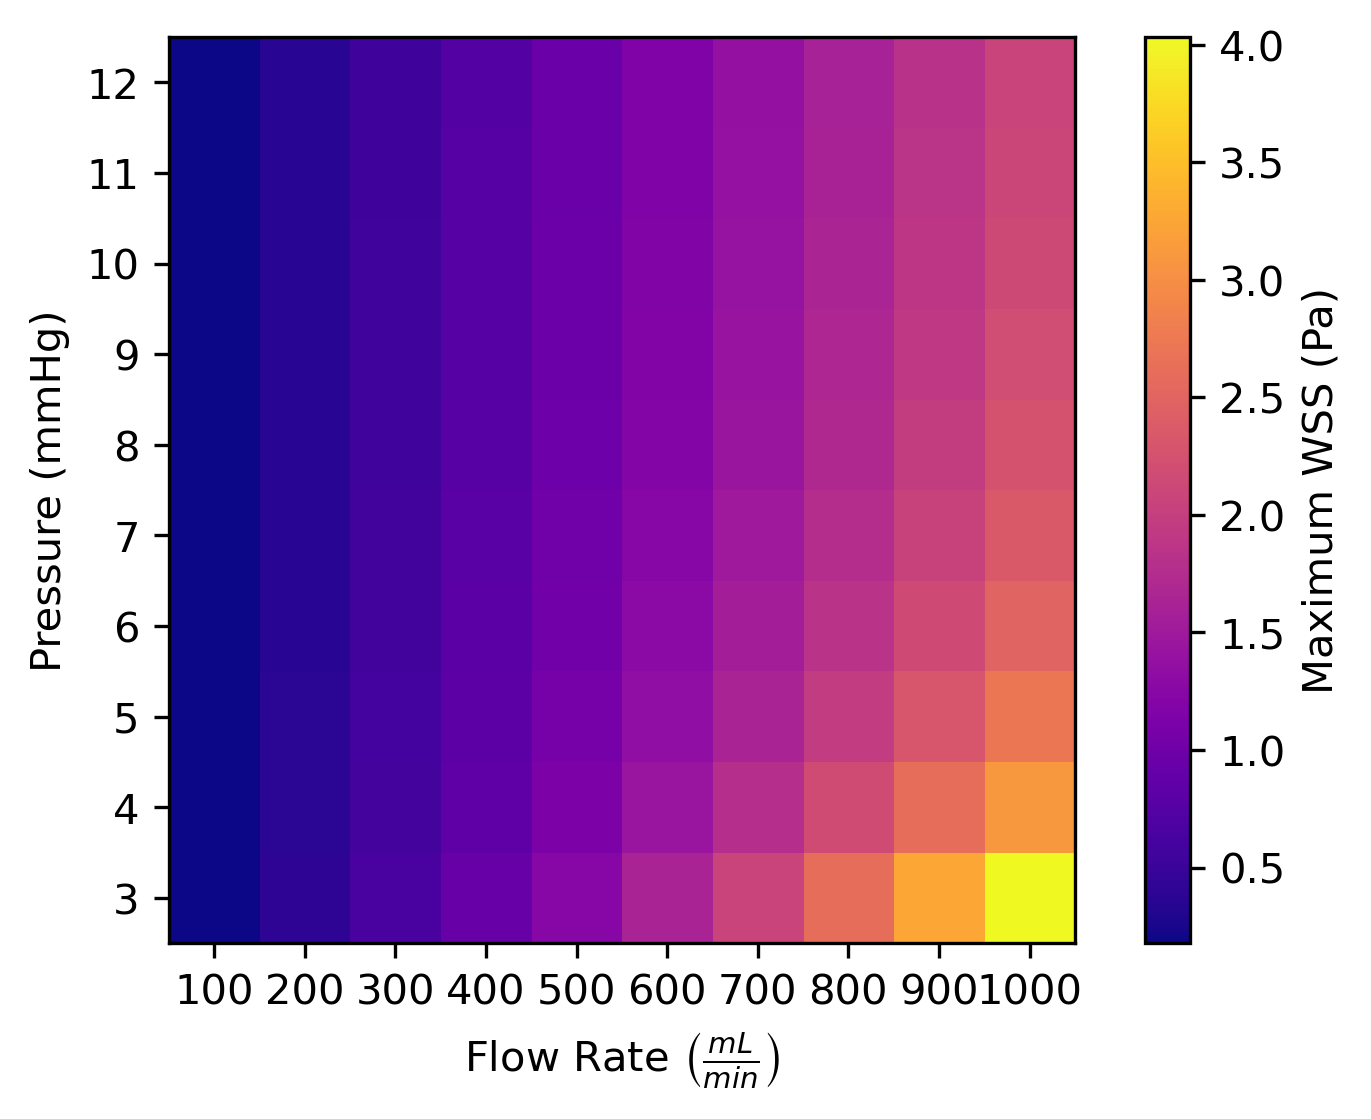

In [23]:
fig = plt.figure(dpi = 300)
plt.imshow(WSS, cmap = 'plasma', origin = 'lower', vmin = 0)
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
plt.colorbar(label = 'Maximum WSS (Pa)')
plt.show()

In [11]:
pressures = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
flows = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

RSL = np.zeros((len(pressures), len(flows)))

for i, pressure in enumerate(pressures):
    for j, flow in enumerate(flows):
        filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(pressure, flow)
        with open(filepath, 'rb') as handle:
            col = pickle.load(handle)
        # Load the relevant variables into 
        RSL[i,j] = col.slList[0].getResistance()

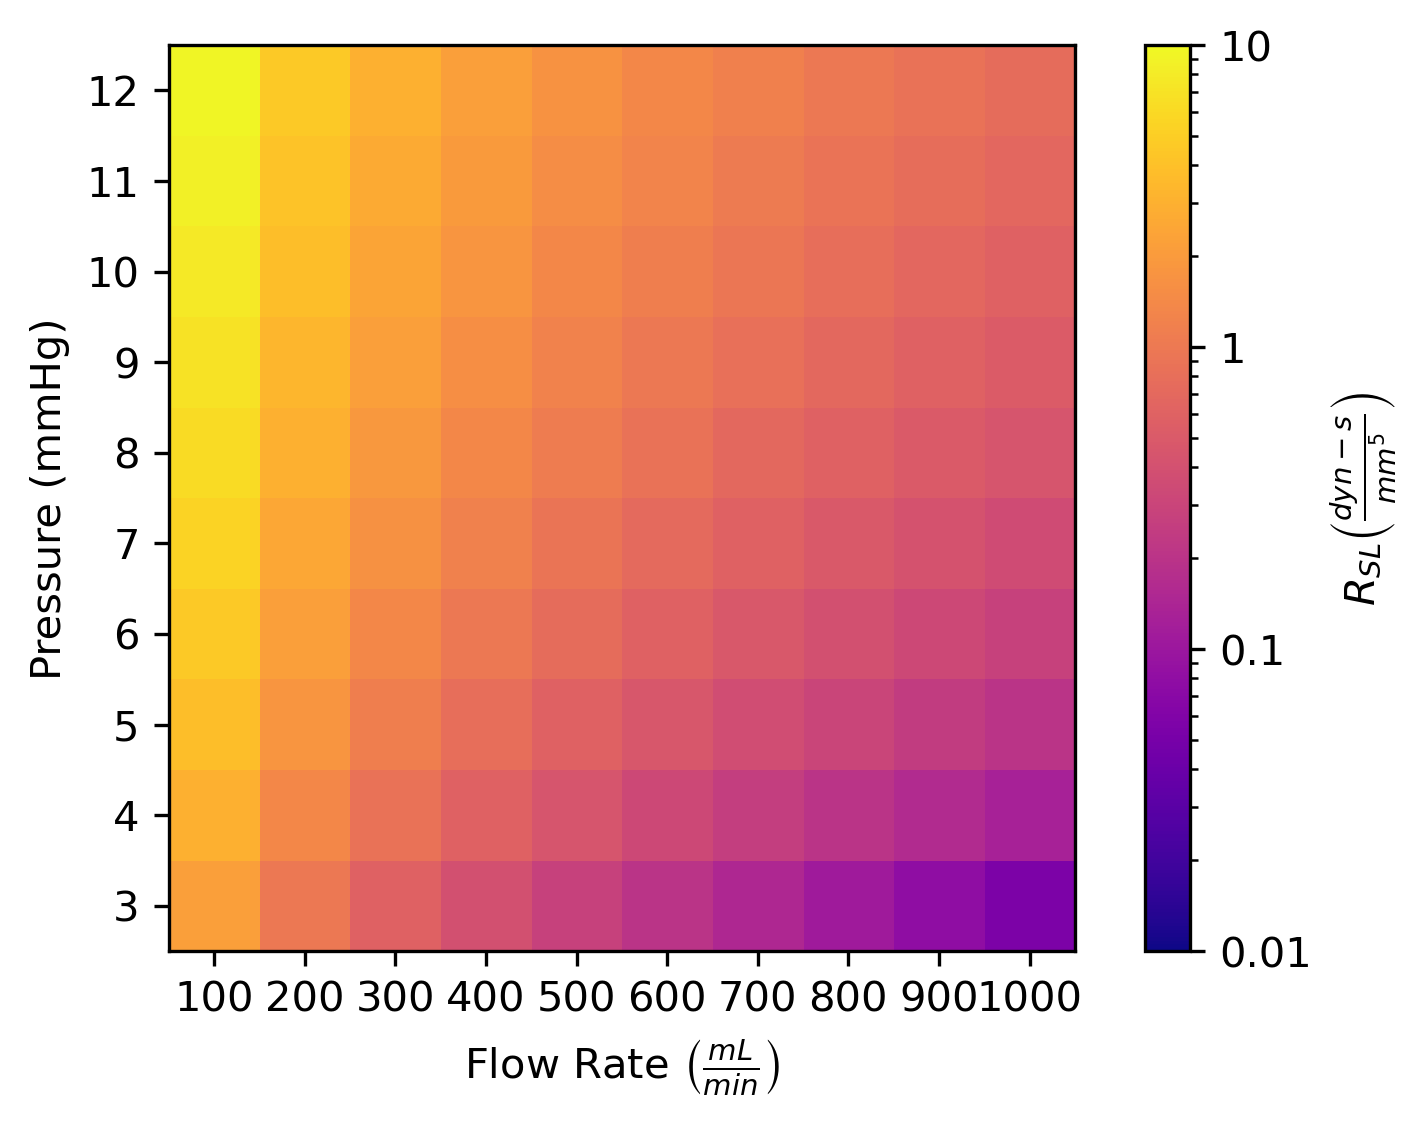

In [22]:
plt.figure(dpi = 300)
# plt.imshow(RSL, cmap = 'plasma', norm = LogNorm(vmin = RSL.min(), vmax = RSL.max()), origin = 'lower')
plt.imshow(RSL, cmap = 'plasma', norm = LogNorm(vmin = 0.01, vmax = 10), origin = 'lower')
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
cbar = plt.colorbar(label = '$R_{SL} \left(\\frac{dyn-s}{mm^5}\\right)$', ticks = [0.01, 0.1, 1, 10])
cbar.ax.set_yticklabels(['0.01', '0.1', '1', '10'])
plt.show()

In [2]:
def getSLConcArray(col):
    # Return an array of concentrations for all SLs in a given colony
    # Rows correspond to a unique SL, columns correspond to a given time step provided by col.tList
    concList = []
    for sl in col.slList:
        concList.append(sl.concentrationList)
    return np.asarray(concList)

def getTimeLastSL(col, threshold):
    slConcArray = getSLConcArray(col)
    # Get the idx where each SL exceeds the threshold
    tIdx = np.argmax(slConcArray > threshold, axis = 1)
    slIdx = np.argmax(tIdx)
    # The time for the last SL to exceed threshold is given by:
    return col.tList[tIdx[slIdx]]

In [3]:
pressures = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
flows = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

t50total = np.zeros((len(pressures), len(flows)))
t50last = np.zeros((len(pressures), len(flows)))

for i, pressure in enumerate(pressures):
    for j, flow in enumerate(flows):
        filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(pressure, flow)
        with open(filepath, 'rb') as handle:
            col = pickle.load(handle)
        # Load the relevant variables into 
        t50total[i,j] = col.tList[np.argmax(np.array(col.concentrationList) > 0.5)]
        t50last[i,j] = getTimeLastSL(col, 0.5)

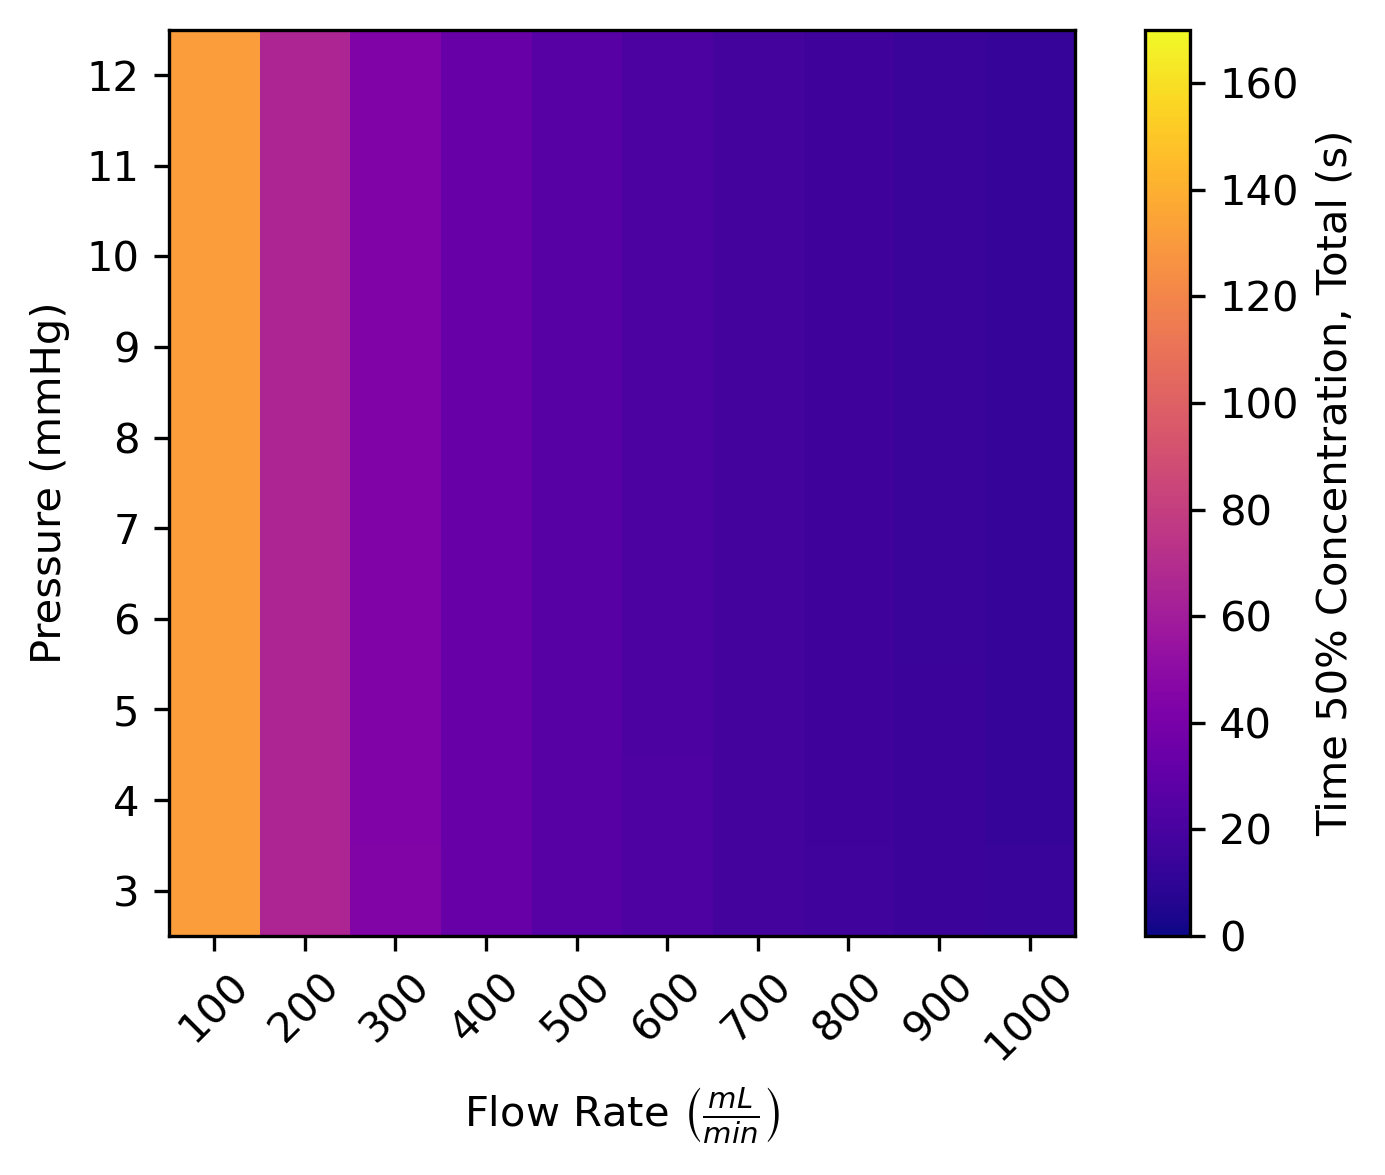

In [32]:
plt.figure(dpi = 300)
plt.imshow(t50total, cmap = 'plasma', origin = 'lower', vmin = 0, vmax = 170)
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
cbar = plt.colorbar(label = 'Time 50% Concentration, Total (s)')
plt.show()

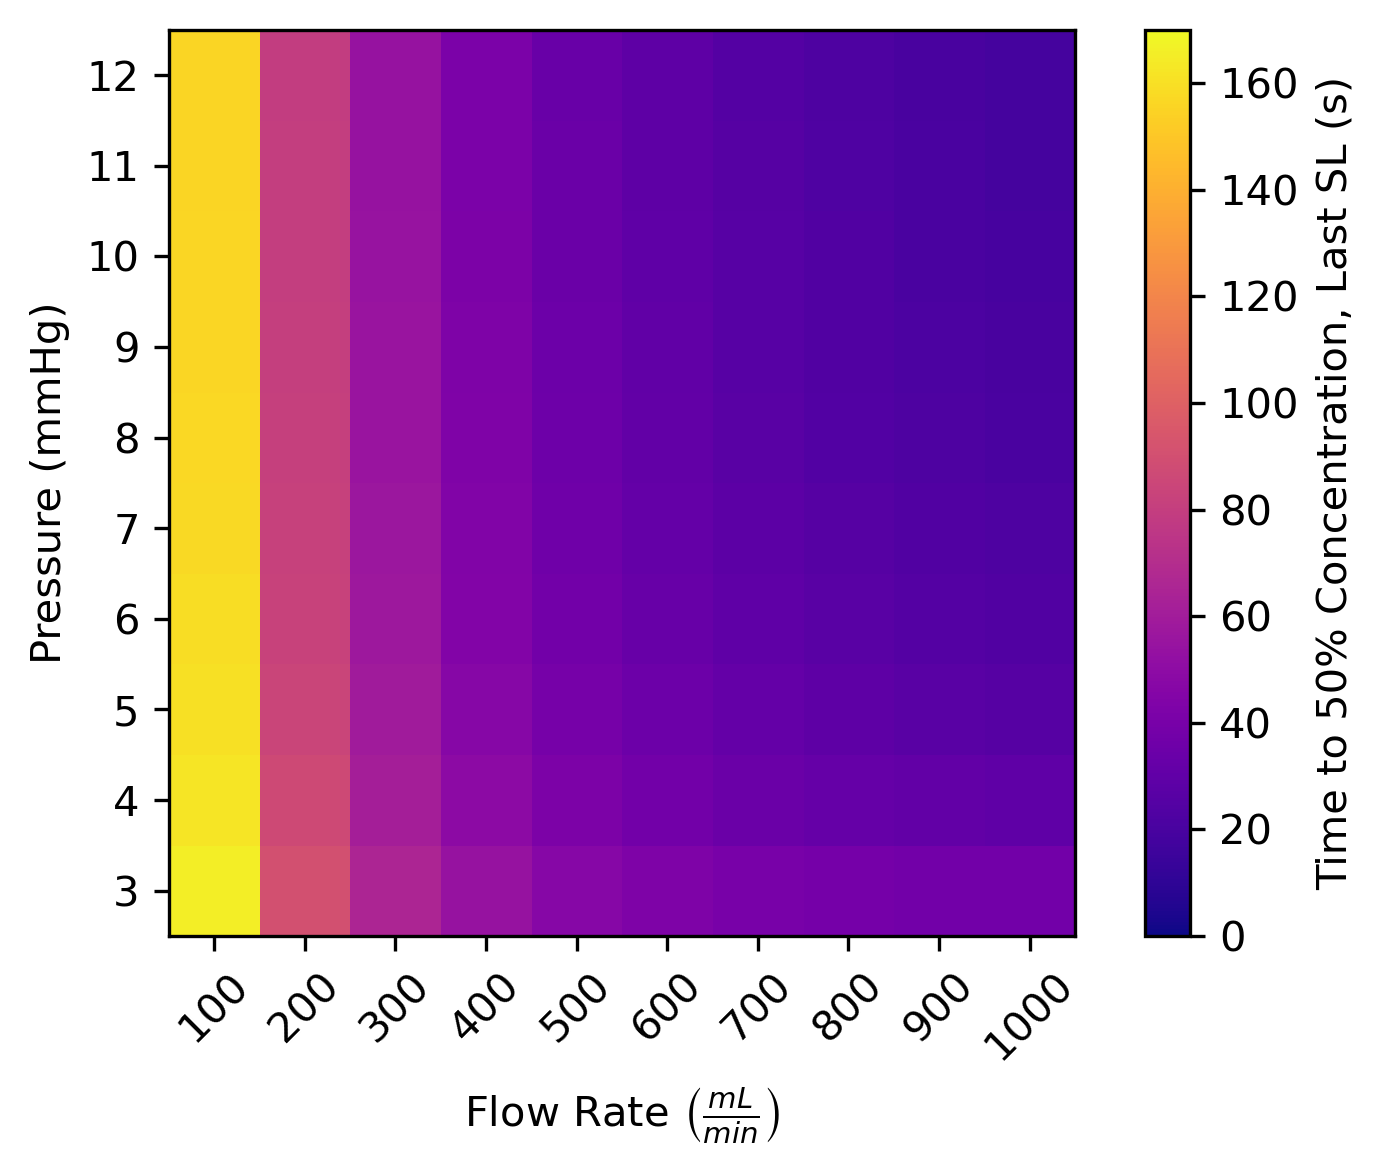

In [30]:
plt.figure(dpi = 300)
plt.imshow(t50last, cmap = 'plasma', origin = 'lower', vmin = 0, vmax = 170)
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
cbar = plt.colorbar(label = 'Time to 50% Concentration, Last SL (s)')
plt.show()

In [6]:
pressures = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
flows = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

t90total = np.zeros((len(pressures), len(flows)))
t90last = np.zeros((len(pressures), len(flows)))

for i, pressure in enumerate(pressures):
    for j, flow in enumerate(flows):
        filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(pressure, flow)
        with open(filepath, 'rb') as handle:
            col = pickle.load(handle)
        # Load the relevant variables into 
        t90total[i,j] = col.tList[np.argmax(np.array(col.concentrationList) > 0.90)]
        t90last[i,j] = getTimeLastSL(col, 0.90)

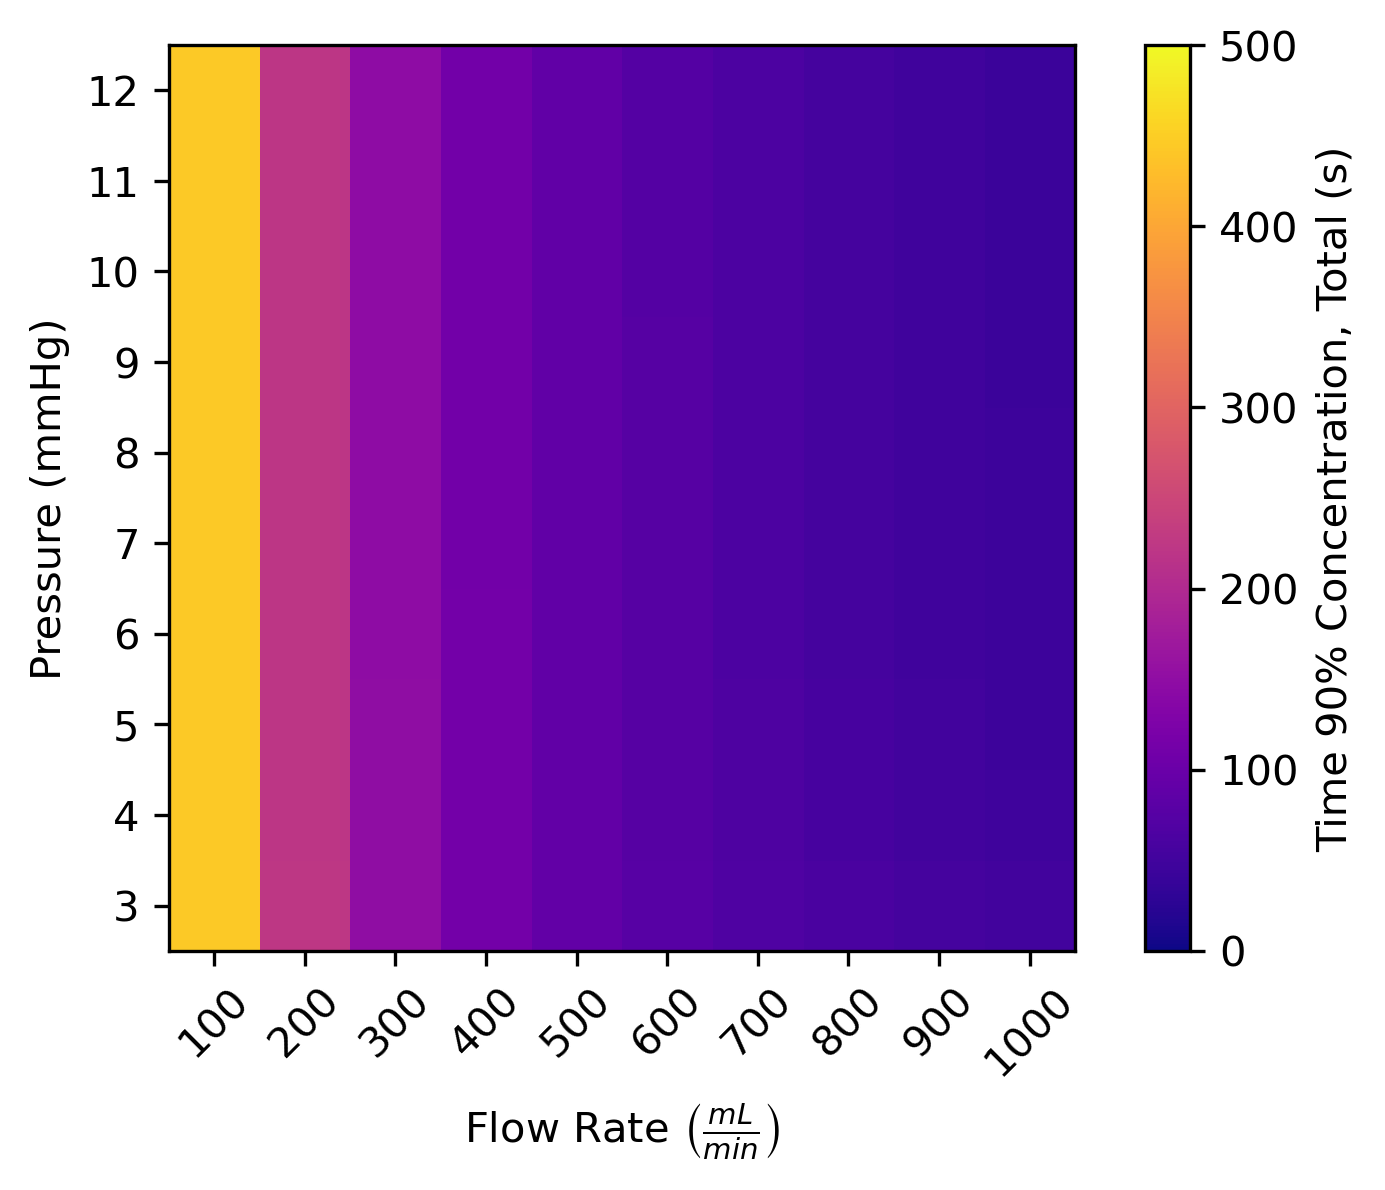

In [13]:
plt.figure(dpi = 300)
plt.imshow(t90total, cmap = 'plasma', origin = 'lower', vmin = 0, vmax = 500)
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
cbar = plt.colorbar(label = 'Time 90% Concentration, Total (s)')
plt.show()

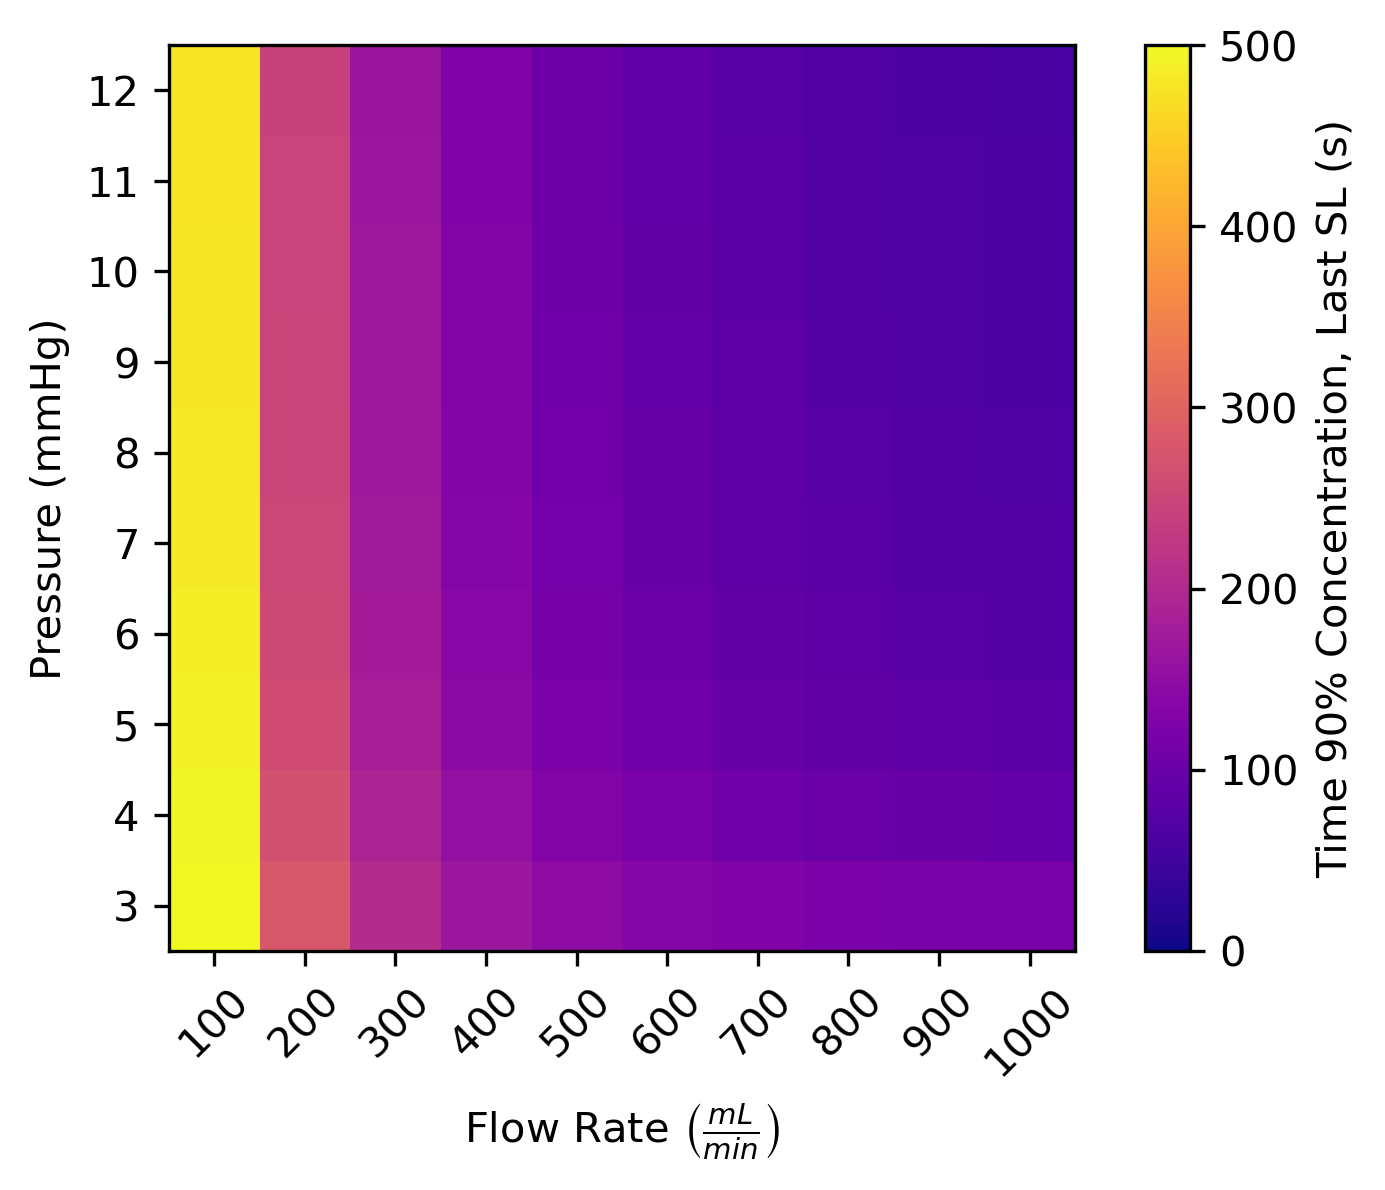

In [11]:
plt.figure(dpi = 300)
plt.imshow(t90last, cmap = 'plasma', origin = 'lower', vmin = 0, vmax = 500)
plt.xlabel('Flow Rate $\left(\\frac{mL}{min}\\right)$')
plt.xticks(ticks = np.arange(len(flows)), labels = flows, rotation = 45)
plt.ylabel('Pressure (mmHg)')
plt.yticks(ticks = np.arange(len(pressures)), labels = pressures)
cbar = plt.colorbar(label = 'Time 90% Concentration, Last SL (s)')
plt.show()

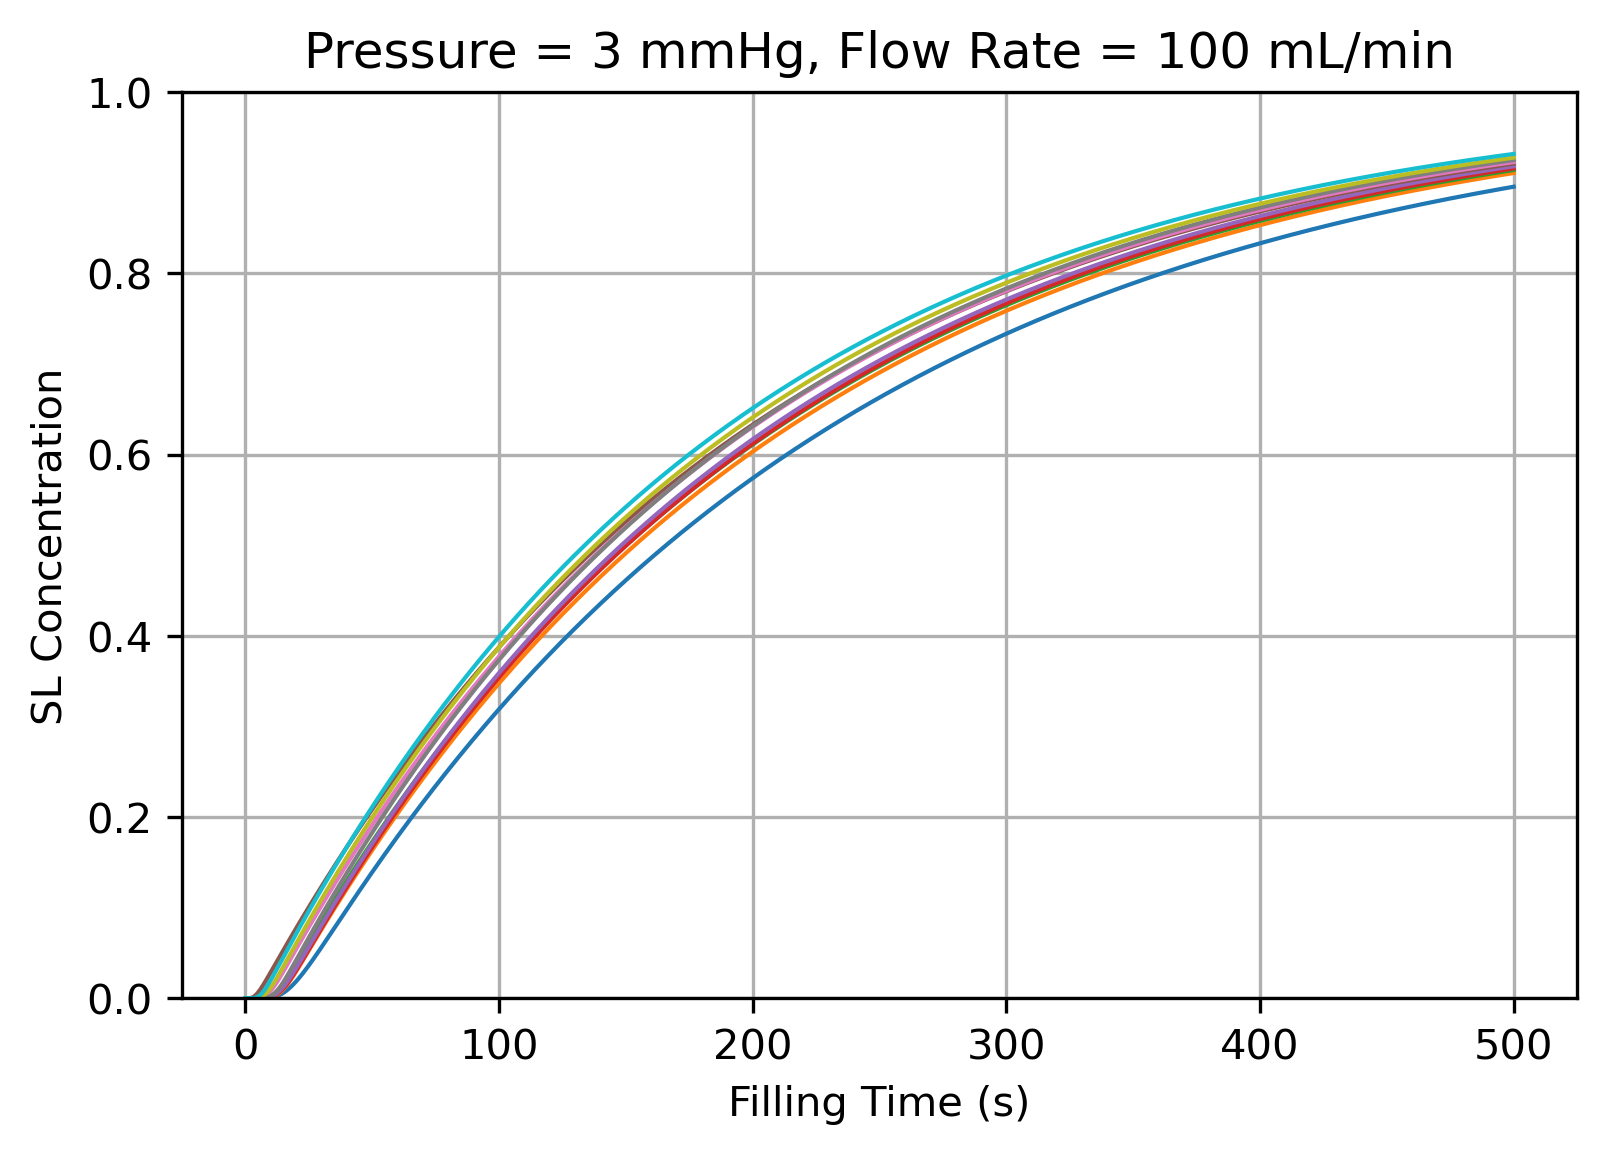

In [93]:
# To accompany the grid plots, plot the SL concentration versus time for two conditions
P = 3
Q = 100
filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(P, Q)
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

# Get 10 SLs, evenly spaced by the rank order of their concentration at end time
arr = getSLConcArray(col)
sortedIdx = np.argsort(arr[:,-1])
idx = sortedIdx[0::11]

fig = plt.figure(dpi = 300)

for i in idx:
    plt.plot(col.tList[:-1], col.slList[i].concentrationList, linewidth = 1)

plt.ylim([0,1])
plt.xlabel('Filling Time (s)')
plt.ylabel('SL Concentration')
plt.title('Pressure = %d mmHg, Flow Rate = %d mL/min' %(P, Q))
plt.grid('on')
plt.show()

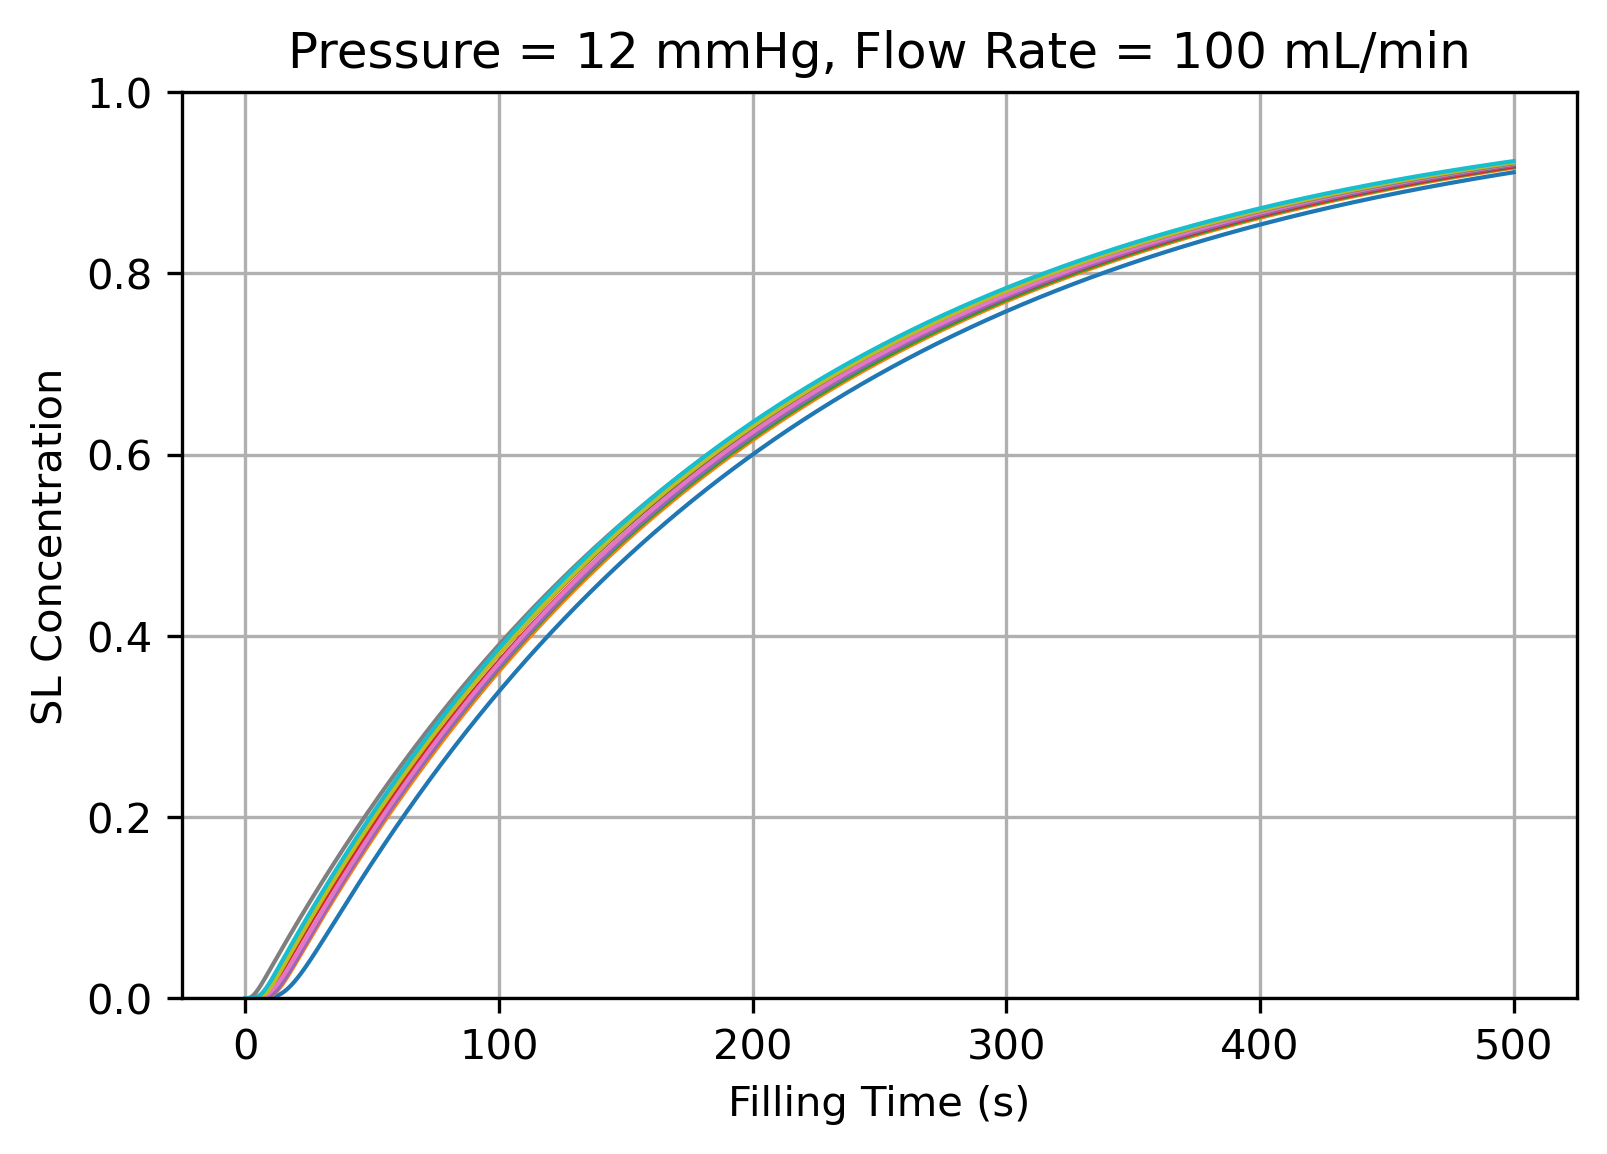

In [94]:
P = 12
Q = 100
filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(P, Q)
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

# Get 10 SLs, evenly spaced by the rank order of their concentration at end time
arr = getSLConcArray(col)
sortedIdx = np.argsort(arr[:,-1])
idx = sortedIdx[0::11]

fig = plt.figure(dpi = 300)

for i in idx:
    plt.plot(col.tList[:-1], col.slList[i].concentrationList, linewidth = 1)

plt.ylim([0,1])
plt.xlabel('Filling Time (s)')
plt.ylabel('SL Concentration')
plt.title('Pressure = %d mmHg, Flow Rate = %d mL/min' %(P, Q))
plt.grid('on')
plt.show()

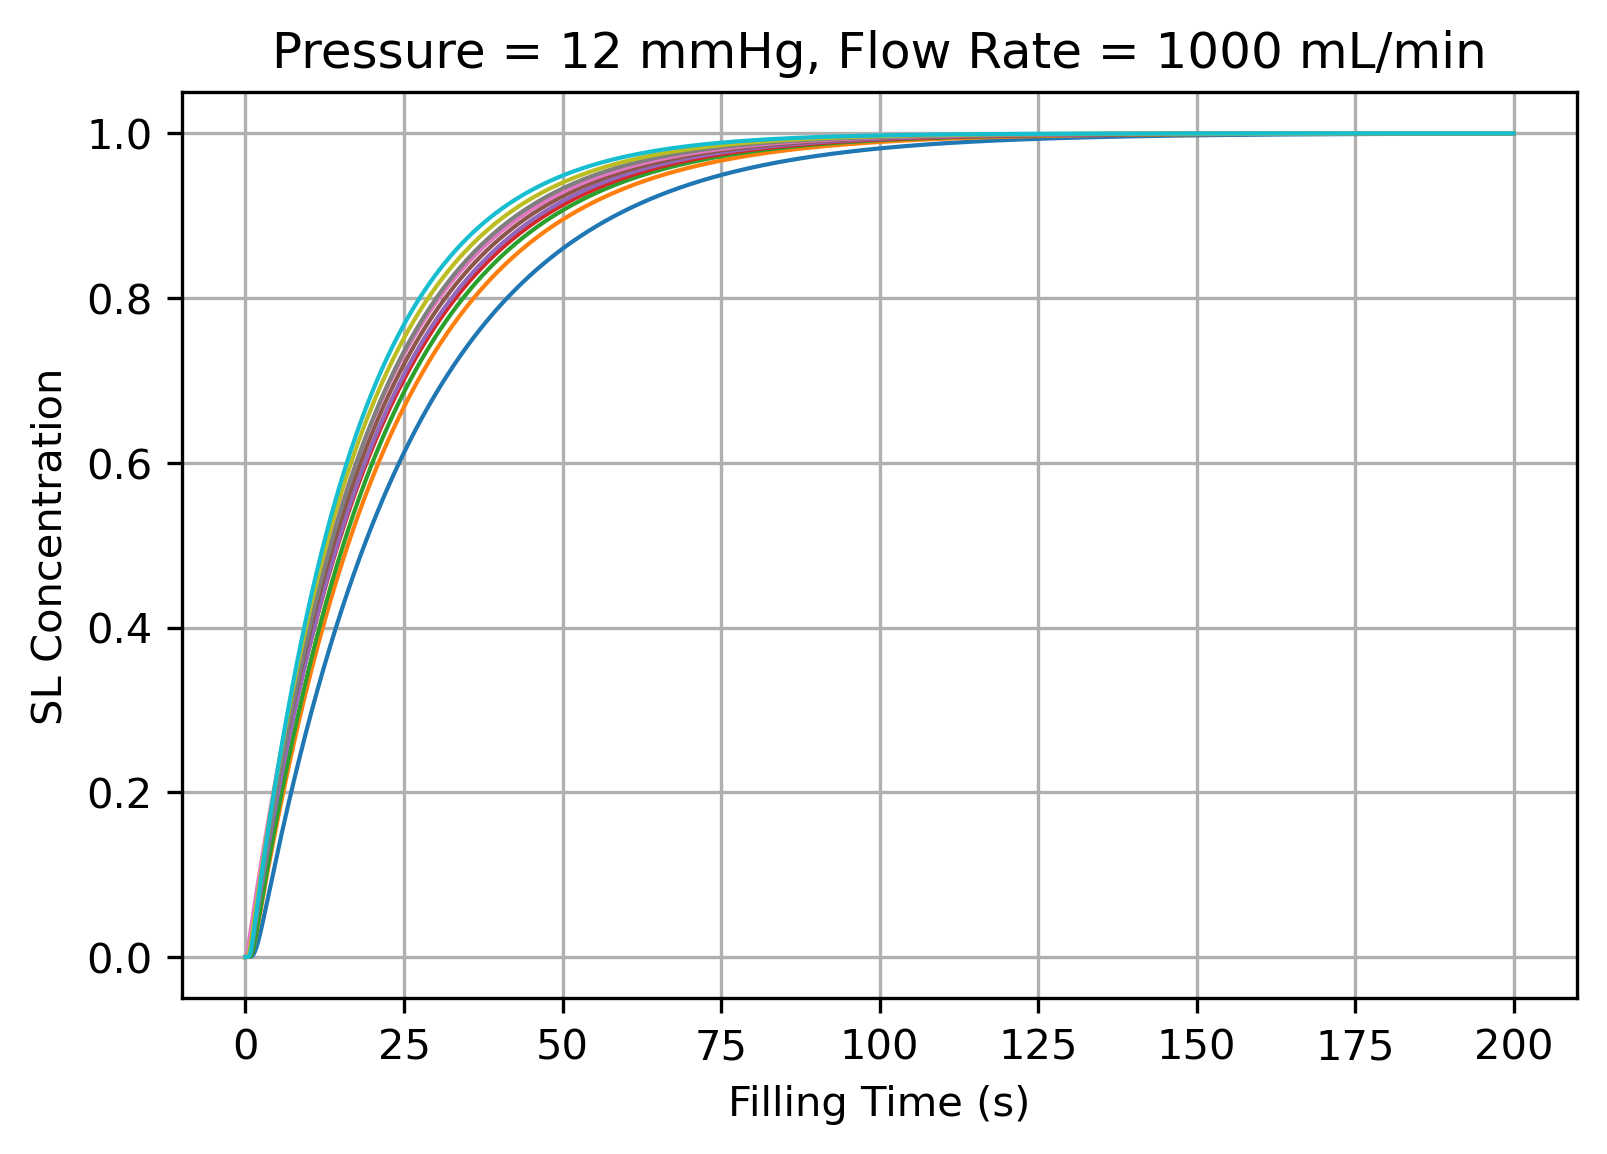

In [97]:
P = 12
Q = 1000
filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(P, Q)
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

# Get 10 SLs, evenly spaced by the rank order of their concentration at end time
arr = getSLConcArray(col)
sortedIdx = np.argsort(arr[:,-1])
idx = sortedIdx[0::11]

fig = plt.figure(dpi = 300)

for i in idx:
    plt.plot(col.tList[:-1], col.slList[i].concentrationList, linewidth = 1)
    
plt.xlabel('Filling Time (s)')
plt.ylabel('SL Concentration')
plt.title('Pressure = %d mmHg, Flow Rate = %d mL/min' %(P, Q))
plt.grid('on')
plt.show()

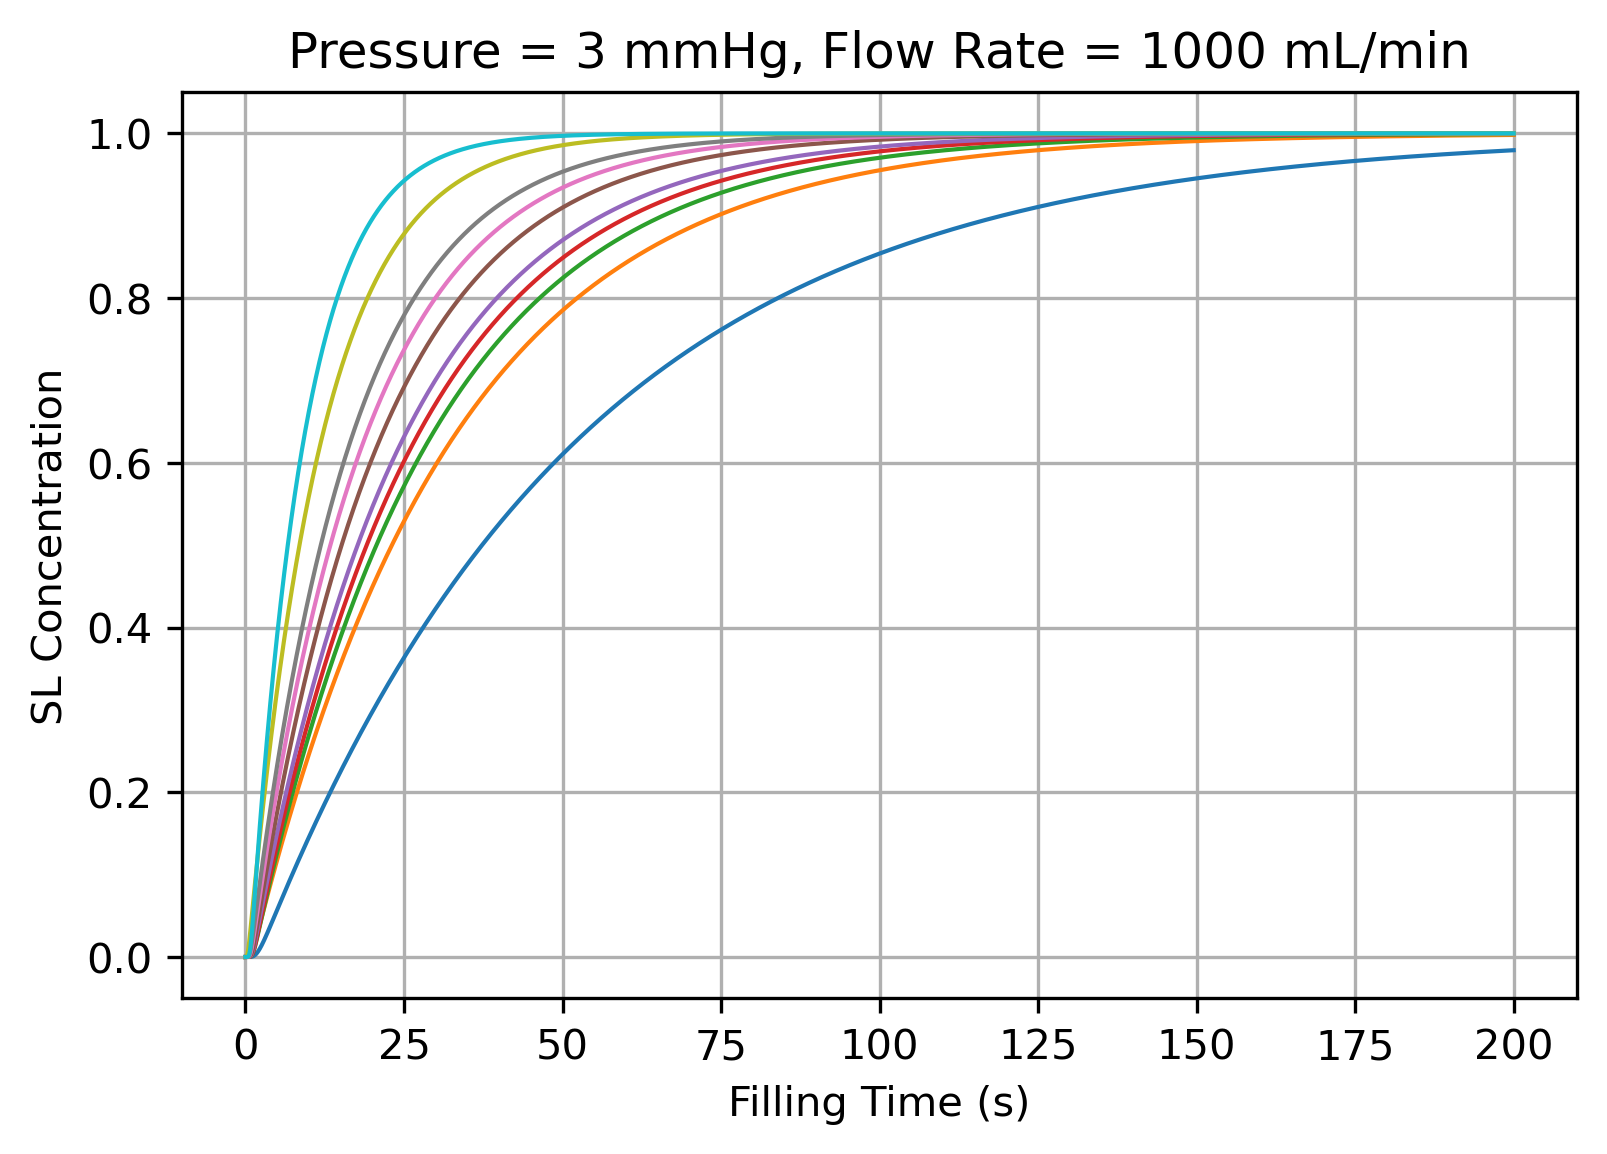

In [98]:
P = 3
Q = 1000
filepath = '../results/PQGrid/P%dQ%d/model.pkl' %(P, Q)
with open(filepath, 'rb') as handle:
    col = pickle.load(handle)

# Get 10 SLs, evenly spaced by the rank order of their concentration at end time
arr = getSLConcArray(col)
sortedIdx = np.argsort(arr[:,-1])
idx = sortedIdx[0::11]

fig = plt.figure(dpi = 300)

for i in idx:
    plt.plot(col.tList[:-1], col.slList[i].concentrationList, linewidth = 1)

plt.xlabel('Filling Time (s)')
plt.ylabel('SL Concentration')
plt.title('Pressure = %d mmHg, Flow Rate = %d mL/min' %(P, Q))
plt.grid('on')
plt.show()